# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [8]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\drito\Documents\SP\scientific_programming\Week_07\challenge


## Functions to get the content of RSS-Feeds

In [9]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """ #geting help
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    rows = []

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description_element = item.find('description', first=True)
            
            # Check if 'description' element exists before accessing 'text'
            description = description_element.text if description_element is not None else ""
            
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            rows.append(row)

    df = pd.DataFrame(rows)
    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [10]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,"Muslime, Leitkultur und Grenzschutz: Die CDU t...","Wed, 17 Apr 2024 09:49:10 GMT",ld.1826586,Die Christlichdemokraten sind von einem zentra...
1,Kroatiens Präsident wettert gegen Verfassungsr...,"Wed, 17 Apr 2024 03:30:00 GMT",ld.1826582,Trotz höchstrichterlichem Verbot ist Staatsobe...
2,Guatemala kämpft gegen eine korrupte Elite. Mä...,"Wed, 17 Apr 2024 03:30:00 GMT",ld.1821933,Die Zivilgesellschaft hat wenig Hoffnung auf e...
3,"Propagandistisch top, militärisch ein Flop – d...","Wed, 17 Apr 2024 03:30:00 GMT",ld.1826612,Irans Führung feiert ihren Angriff auf Israel ...
4,Iran greift Israel an – die Rekonstruktion ein...,"Tue, 16 Apr 2024 14:49:51 GMT",ld.1826398,Der Angriff auf Israel war erwartet worden. So...
5,Scholz zu Besuch in Peking: Kaum ein anderes L...,"Tue, 16 Apr 2024 14:50:00 GMT",ld.1826534,Die Sicherheitslage in Europa dominiert das Tr...
6,Kehrtwende in Washington: Jetzt soll im Repräs...,"Tue, 16 Apr 2024 02:02:38 GMT",ld.1826513,Die Republikaner im Repräsentantenhaus weigern...
7,Israels Militär hat die Pläne für den Gegensch...,"Mon, 15 Apr 2024 17:00:04 GMT",ld.1826401,Während das Kriegskabinett für Zurückhaltung p...
8,Der Strafprozess gegen Trump ist ungewöhnlich ...,"Tue, 16 Apr 2024 03:30:00 GMT",ld.1826454,Am Montag begann der Strafprozess in New York ...
9,Der Russland-Spion in Österreichs Verfassungss...,"Tue, 16 Apr 2024 03:30:00 GMT",ld.1826166,Jan Marsaleks Helfer in Wien konnte nach Warnu...


## Getting infos from multiple RSS-Feeds

In [11]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(10)

,title,pubDate,guid,description
0,Deutsche Bahn – neuer Abteiltyp: Mehr Zweisamk...,"Wed, 17 Apr 2024 12:26:00 +0200",https://www.spiegel.de/auto/deutsche-bahn-neue...,"Ohne Mithörer sprechen, ungestört küssen, in R..."
1,Japan: Schlange bremst Hochgeschwindigkeitszug...,"Wed, 17 Apr 2024 12:14:00 +0200",https://www.spiegel.de/panorama/japan-schlange...,Die blitzschnellen japanischen Hochgeschwindig...
2,Europa-Wahl: Europa-Optimismus der Deutschen h...,"Wed, 17 Apr 2024 12:14:00 +0200",https://www.spiegel.de/politik/deutschland/eur...,Wenige Wochen vor der Europawahl blicken laut ...
3,Interview mit Frank-Walter Steinmeier: Haben S...,"Wed, 17 Apr 2024 12:13:00 +0200",https://www.spiegel.de/deinspiegel/interview-m...,Frank-Walter Steinmeier hat sich mit den Kinde...
4,Gerhard Schröder: Altbundeskanzler hat auf 80....,"Wed, 17 Apr 2024 11:55:00 +0200",https://www.spiegel.de/politik/deutschland/ger...,Eine Party ohne Parteigenossen? Kein Problem f...
5,Halbmarathon in Peking: Faire Geste oder Betru...,"Wed, 17 Apr 2024 11:54:00 +0200",https://www.spiegel.de/sport/halbmarathon-in-p...,Lange war He Jie beim Halbmarathon in Peking e...
6,Asiatische Tigermücke: Wie groß ist das Infekt...,"Wed, 17 Apr 2024 11:53:00 +0200",https://www.spiegel.de/wissenschaft/asiatische...,"Baden-Württemberg, Hessen, Jena, Berlin: die A..."
7,"Inflation in der Eurozone fällt auf 2,4 Prozent","Wed, 17 Apr 2024 11:49:00 +0200",https://www.spiegel.de/wirtschaft/inflation-in...,Die Zeit drastischer Preisanstiege für Lebensm...
8,Europäischer Gaspreis steigt auf höchsten Stan...,"Wed, 17 Apr 2024 11:38:00 +0200",https://www.spiegel.de/wirtschaft/europaeische...,Plus 20 Prozent binnen einer Woche: Der Gaspre...
9,Lateinamerika: Wilde Worte und Drohungen zwisc...,"Wed, 17 Apr 2024 11:36:00 +0200",https://www.spiegel.de/ausland/lateinamerika-w...,"Beleidigungen, diplomatische Krisen und handfe..."


## Finding the k most frequent words per RSS-Feed title

In [12]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('Deutsche', 1), ('Bahn', 1), ('–', 1), ('neuer', 1), ('Abteiltyp:', 1)]
[('Japan:', 1), ('Schlange', 1), ('bremst', 1), ('Hochgeschwindigkeitszug', 1), ('aus', 1)]
[('Europa-Wahl:', 1), ('Europa-Optimismus', 1), ('der', 1), ('Deutschen', 1), ('hält', 1)]
[('Interview', 1), ('mit', 1), ('Frank-Walter', 1), ('Steinmeier:', 1), ('Haben', 1)]
[('Gerhard', 1), ('Schröder:', 1), ('Altbundeskanzler', 1), ('hat', 1), ('auf', 1)]
[('Halbmarathon', 1), ('in', 1), ('Peking:', 1), ('Faire', 1), ('Geste', 1)]
[('Asiatische', 1), ('Tigermücke:', 1), ('Wie', 1), ('groß', 1), ('ist', 1)]
[('Inflation', 1), ('in', 1), ('der', 1), ('Eurozone', 1), ('fällt', 1)]
[('Europäischer', 1), ('Gaspreis', 1), ('steigt', 1), ('auf', 1), ('höchsten', 1)]
[('Lateinamerika:', 1), ('Wilde', 1), ('Worte', 1), ('und', 1), ('Drohungen', 1)]
[('»Scrubs«-Stars', 1), ('zeigen', 1), ('sich', 1), ('gemeinsam', 1), ('–', 1)]
[('Champions', 1), ('League:', 1), ('PSG-Coach', 1), ('Luis', 1), ('Enrique', 1)]
[('Ukrainekrieg:', 

## Create a wordcloud with the most frequent words in RSS-Feed titles

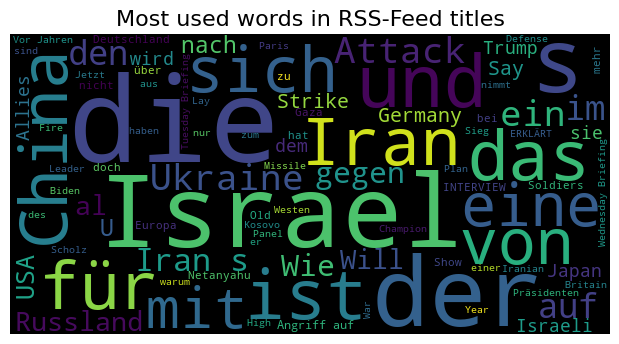

In [13]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [14]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-04-17 12:31:05
Python Version: 3.11.7
-----------------------------------
